# Добин. Вариант 27

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_hw = pd.read_csv("Homework_2_data.csv", sep=";")
year = 2023
industry = ''
region = "Оренбургская область, Орск"
if industry == '':
    df = (df_hw[(df_hw.year == year) 
                     & (df_hw.region == region)])
elif region == '':
    df = (df_hw[(df_hw.year == year) 
                     & (df_hw. industry == industry )])
df

,region,educ,age,female,industry,work_hours,wage,foreign_language,internet,alcohol,is_children,health,weight,height,smoke,year
143,"Оренбургская область, Орск",0,"40,5",0,"ТРАНСПОРТ, СВЯЗЬ",12,45000,0,1,1,1,0,80,180,1,2023
515,"Оренбургская область, Орск",1,55,1,ОБРАЗОВАНИЕ,5,15000,1,1,1,1,0,87,166,0,2023
631,"Оренбургская область, Орск",2,46,1,ОБРАЗОВАНИЕ,8,32000,1,1,1,1,1,59,156,0,2023
632,"Оренбургская область, Орск",0,47,0,"ТРАНСПОРТ, СВЯЗЬ",12,50000,1,1,1,1,0,115,186,0,2023
633,"Оренбургская область, Орск",1,"54,5",1,ВОЕННО-ПРОМЫШЛЕННЫЙ КОМПЛЕКС,8,38700,0,1,0,1,1,60,152,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,"Оренбургская область, Орск",2,43,1,ОРГАНЫ УПРАВЛЕНИЯ,8,40000,1,1,1,1,0,69,158,0,2023
4513,"Оренбургская область, Орск",2,37,0,"ТРАНСПОРТ, СВЯЗЬ",12,40000,1,1,1,1,0,94,170,0,2023
4514,"Оренбургская область, Орск",2,37,1,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",10,30000,1,1,1,1,0,62,158,0,2023
4515,"Оренбургская область, Орск",1,44,0,"ТОРГОВЛЯ, БЫТОВОЕ ОБСЛУЖИВАНИЕ",8,50000,1,1,1,1,0,89,183,0,2023


In [3]:
df=df.copy()
df['age'] = df['age'].str.replace(',', '.')
df['age'] = pd.to_numeric(df['age'])
df['height'] = pd.to_numeric(df['height'])
df['weight'] = pd.to_numeric(df['weight'])
df['wage'] = pd.to_numeric(df['wage'])

# 1.

In [4]:
import statsmodels.api as sm
from scipy.stats import jarque_bera
from sklearn.linear_model import LinearRegression
df['high'] = np.where(df['educ'] ==2, 1, 0)
y = df['wage']
X = df[['age','high','female','is_children','smoke']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     2.998
Date:                Sun, 15 Dec 2024   Prob (F-statistic):             0.0216
Time:                        23:35:08   Log-Likelihood:                -1317.4
No. Observations:                 115   AIC:                             2645.
Df Residuals:                     110   BIC:                             2658.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age          -129.8541    253.078     -0.513      

# 2.

In [5]:
df['logw'] = np.log(df['wage'])
y = df['logw']
X = df[['age','high','female','is_children','smoke']]
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
summary = model2.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   logw   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     8.999
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           2.52e-06
Time:                        23:35:08   Log-Likelihood:                -54.944
No. Observations:                 115   AIC:                             119.9
Df Residuals:                     110   BIC:                             133.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age            -0.0062      0.004     -1.429      

# 3.

In [6]:
df['loga'] = np.log(df['age'])
y = df['logw']
X = df[['loga','high','female','is_children','smoke']]
X = sm.add_constant(X)
model3 = sm.OLS(y, X).fit()
summary = model3.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   logw   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     8.724
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           3.73e-06
Time:                        23:35:08   Log-Likelihood:                -55.380
No. Observations:                 115   AIC:                             120.8
Df Residuals:                     110   BIC:                             134.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
loga           -0.2175      0.199     -1.094      

# 4.

### PE-тест

In [7]:
import statsmodels.formula.api as smf
lin = smf.ols('wage ~ age + high + female + is_children + smoke', data = df).fit()
log = smf.ols('logw ~ loga + high + female + is_children + smoke', data = df).fit()
df['lin'] = np.log(lin.fittedvalues) - log.fittedvalues
df['log'] = lin.fittedvalues - np.exp(log.fittedvalues)
model_with_lin = smf.ols('wage ~ age + high + female + is_children + smoke + lin', data = df).fit()
model_with_log = smf.ols('logw ~ loga + high + female + is_children + smoke + log', data = df).fit()
print(model_with_lin.summary())
print(model_with_log.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     2.672
Date:                Sun, 15 Dec 2024   Prob (F-statistic):             0.0256
Time:                        23:35:08   Log-Likelihood:                -1316.7
No. Observations:                 115   AIC:                             2645.
Df Residuals:                     109   BIC:                             2662.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.045e+04   7682.040      2.662      

## Тест Бокса-Кокса

In [8]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

bc_transformed, lambda_bc = boxcox(df['wage'])  
df['bc_wage'] = bc_transformed

bc_model = smf.ols('bc_wage ~ age + high + female + is_children + smoke', data=df).fit()

print(f"Лучшая lambda для преобразования Бокса-Кокса: {lambda_bc}")
print(bc_model.summary())

lin_pred = lin.fittedvalues
log_pred = np.exp(log.fittedvalues)
bc_pred = inv_boxcox(bc_model.fittedvalues, lambda_bc)

rss_lin = np.sum((df['wage'] - lin_pred) ** 2)
rss_log = np.sum((df['wage'] - log_pred) ** 2)
n = len(df)

statistic = (n / 2) * np.abs(np.log(rss_lin / rss_log))
print(f"\nТестовая статистика n/2 ln((RSS_lin / RSS_log)): {statistic}")

Лучшая lambda для преобразования Бокса-Кокса: -0.5305114150640363
                            OLS Regression Results                            
Dep. Variable:                bc_wage   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     11.48
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           8.01e-08
Time:                        23:35:09   Log-Likelihood:                 588.36
No. Observations:                 115   AIC:                            -1167.
Df Residuals:                     110   BIC:                            -1153.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [9]:
y = df['logw']
X = df[['age','high','female','is_children','smoke']]
X = sm.add_constant(X)

# 5.

In [10]:
y2, X2 = df['logw'], df[['age','high','is_children','smoke']]
X2 = sm.add_constant(X2)
model5 = sm.OLS(y2, X2).fit()
model_summary = model5.summary()

In [11]:
import scipy.stats as sts
df_men = df[df['female'] == 0]
df_women = df[df['female'] == 1]
X_men = df_men[['age', 'high', 'is_children', 'smoke']]
X_men = sm.add_constant(X_men)
y_men = df_men['logw']
X_women = df_women[['age', 'high', 'is_children', 'smoke']]
X_women = sm.add_constant(X_women)
y_women = df_women['logw']
model_men = sm.OLS(y_men, X_men).fit()
model_women = sm.OLS(y_women, X_women).fit()
rss_women, rss_men, rss_comb = model_women.ssr, model_men.ssr, model5.ssr
numerator = (rss_comb - (rss_men + rss_women)) / (model5.df_model+1)
denominator = (rss_men + rss_women) / (df.shape[0] - 2 * model5.df_model - 2)
F_observed = numerator / denominator
F_critical = sts.f.ppf(1-0.05, model5.df_model+1, df.shape[0] - 2 * model5.df_model - 2)
p_value = 1 - sts.f.cdf(F_observed, model5.df_model+1, df.shape[0] - 2 * model5.df_model - 2)
print(f"P-value: {p_value}")

P-value: 6.733238051670476e-06


H0 отвергается, следовательно выборка неоднородна и разница в зарплатах есть

In [12]:
df['female_high'] = df['high'] * df['female']
df['female_is_children'] = df['female'] * df['is_children']
df['female_smoke']  = df['female'] * df['smoke']
df['female_age']  = df['female'] * df['age']

X_dummy = sm.add_constant(df[['age', 'high', 'female', 'is_children', 'smoke',
                                          'female_high', 'female_is_children', 'female_smoke', 'female_age']])

model_dummy = sm.OLS(df['logw'], X_dummy).fit()

hypotheses = '(female_high = 0), (female_is_children = 0), (female_smoke = 0), (female = 0), (female_age = 0)'
f_test = model_dummy.f_test(hypotheses)
print(f"Результат F-теста: F={f_test.fvalue}, p={f_test.pvalue}")

Результат F-теста: F=8.345601809953683, p=6.733238051699951e-06


/Users/ilushka/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '


p-value совпадает с p-value теста чоу

# 6.

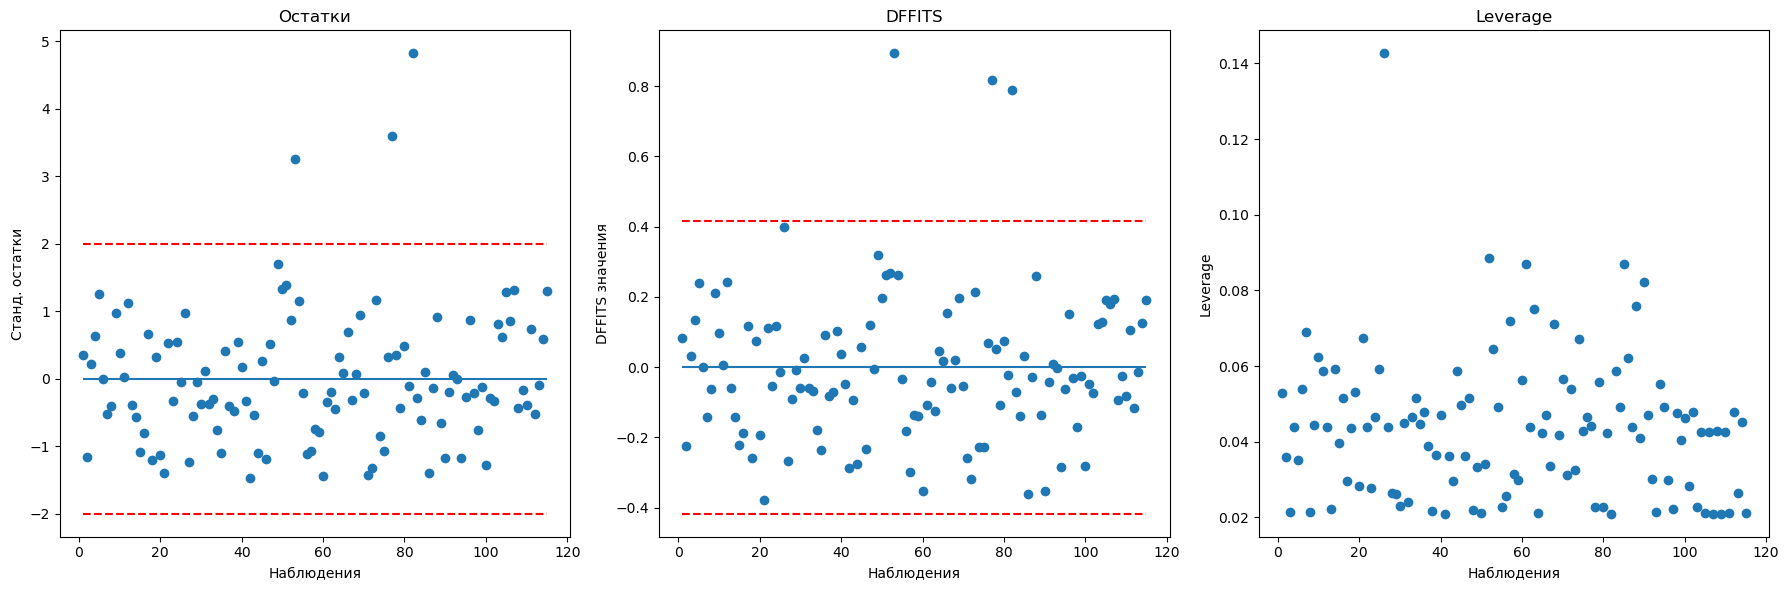

In [13]:
import numpy as np
import matplotlib.pyplot as plt

influence = model2.get_influence()
studentized_residuals = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag
dffits = influence.dffits[0]
observations = np.arange(1, len(df) + 1)
dffits_threshold = 2 * np.sqrt((X.shape[1]) / len(X))

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(observations, studentized_residuals)
plt.hlines(0, xmin=min(observations), xmax=max(observations))
plt.hlines([2, -2], xmin=min(observations), xmax=max(observations), color='red', linestyle='dashed')
plt.title('Остатки')
plt.xlabel('Наблюдения')
plt.ylabel('Cтанд. остатки')

plt.subplot(1, 3, 2)
plt.scatter(observations, dffits)
plt.hlines(0, xmin=min(observations), xmax=max(observations))
plt.hlines([dffits_threshold, -dffits_threshold], xmin=min(observations), xmax=max(observations), color='red', linestyle='dashed')
plt.title('DFFITS')
plt.xlabel('Наблюдения')
plt.ylabel('DFFITS значения')

plt.subplot(1, 3, 3)
plt.scatter(observations, leverage)
plt.title('Leverage')
plt.xlabel('Наблюдения')
plt.ylabel('Leverage')


plt.tight_layout()
plt.show()


Выбросов немного, поэтому нет смысла их удалять, так как наблюдений и так довольно мало

# 7.

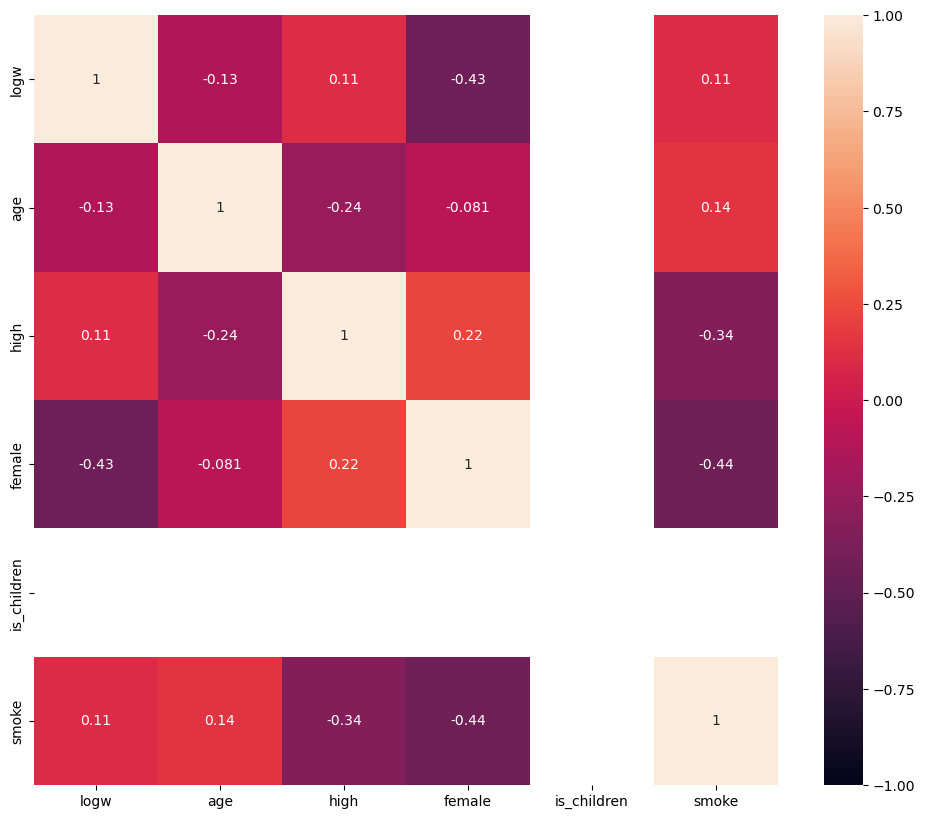

In [14]:
import seaborn as sns

df_7 = df[['logw', 'age', 'high', 'female', 'is_children', 'smoke']]
corr_matrix = df_7.corr()
plt.figure(figsize=(12, 10)) 
sns.heatmap(corr_matrix, 
            annot=True,      
            vmin=-1, vmax=1)
plt.show()

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("Feature\t\tVIF")
for i, feature in enumerate(X.columns):
    vif = variance_inflation_factor(X.values, i)
    print(f"{feature}\t\t{vif:.2f}")

Feature		VIF
age		1.06
high		1.19
female		1.25
is_children		35.72
smoke		1.35


In [16]:
condition_number = np.linalg.cond(model2.model.exog)
print(f'Число обусловленности: {condition_number}')

Число обусловленности: 286.6634307442073


Большое число обусловленности говорит о высокой вероятности присутствия мультиколлинеарности. Но VIF указывает на её отсутствие, поэтому будем считать, что её нет.

# 8.

Посчитаем, сколько нужно главных компонент для объяснения хотя бы 75% объясненой дисперсии и доля дисперсии от количества компонент.

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
pca = PCA()
principalComponents = pca.fit_transform(X_std)
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
n_components_required = (cumulative_explained_variance >= 0.75).argmax() + 1

print(f"Для объяснения как минимум 75% дисперсии требуется {n_components_required} компонент(ы).")
print(f"Кумулятивная объясненная дисперсия для каждой компоненты: {cumulative_explained_variance}")

Для объяснения как минимум 75% дисперсии требуется 3 компонент(ы).
Кумулятивная объясненная дисперсия для каждой компоненты: [0.44164877 0.68819582 0.86655462 1.         1.        ]


# 9.

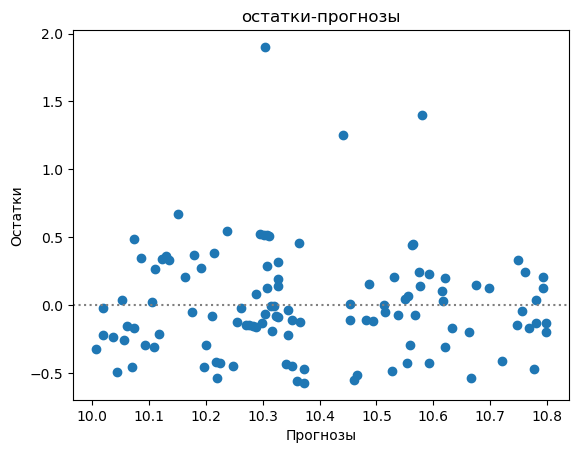

In [18]:
fittedvalues = model2.fittedvalues
resid = model2.resid

plt.scatter(fittedvalues, resid)
plt.xlabel('Прогнозы')
plt.ylabel('Остатки')
plt.title('остатки-прогнозы')
plt.axhline(y=0, color='gray', linestyle='dotted')
plt.show()

# 10.

### Тест Уайта

In [19]:
from statsmodels.stats.diagnostic import het_white

model_white = smf.ols(formula='logw ~ age + high + female + is_children + smoke', data=df).fit()
residuals = model_white.resid
predictions = model_white.fittedvalues
statistic, p_value, f_statistic, f_p_value = het_white(residuals, model_white.model.exog)

print(f'Тестовая статистика теста Уайта: {statistic}')
print(f'P-значение теста Уайта: {p_value}')
print(f'fpvalue: {f_p_value}')

Тестовая статистика теста Уайта: 3.310994568690732
P-значение теста Уайта: 0.9859446773205406
fpvalue: 0.9887607053486053


На 5% уровне значимости нулевая гипотеза не отвергается, следовательно, нет оснований считать, что присутствует гетероскедастичность.
### Тест Бройша - Пагана

In [20]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_statistic, bp_p_value, bp_f_statistic, bp_f_p_value = het_breuschpagan(residuals, model_white.model.exog)

print(f'Тестовая статистика теста Бройша-Пагана: {bp_statistic}')
print(f'P-значение теста Бройша-Пагана: {bp_p_value}')

Тестовая статистика теста Бройша-Пагана: 0.20183794450780224
P-значение теста Бройша-Пагана: 0.9990939533629206


# 11.

In [21]:
from statsmodels.stats.diagnostic import linear_reset

reset_test = linear_reset(model2, power=2, use_f=True)

print(f'Results of the Ramsey RESET Test:\n{reset_test}')

Results of the Ramsey RESET Test:
<F test: F=1.2763707733399752, p=0.26105497616465106, df_denom=109, df_num=1>


H0 не отвергается => у модели адекватная спецификация

# 12.

In [22]:
X_sig = df[["high", "female", "is_children"]]
X_sig = sm.add_constant(X_sig)
model_sig = sm.OLS(y, X_sig).fit()
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                   logw   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     16.84
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           4.03e-07
Time:                        23:35:10   Log-Likelihood:                -56.105
No. Observations:                 115   AIC:                             118.2
Df Residuals:                     112   BIC:                             126.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
high            0.1954      0.076      2.558      

Сделаем PE-тест

In [23]:
import statsmodels.formula.api as smf
lin = smf.ols('wage ~ age + high + female + is_children + smoke', data = df).fit()
log = smf.ols('logw ~ high + female + is_children', data = df).fit()
df['lin'] = np.log(lin.fittedvalues) - log.fittedvalues
df['log'] = lin.fittedvalues - np.exp(log.fittedvalues)
model_with_lin = smf.ols('wage ~ age + high + female + is_children + smoke + lin', data = df).fit()
model_with_log = smf.ols('logw ~ high + female + is_children + log', data = df).fit()
print(model_with_lin.summary())
print(model_with_log.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2.516
Date:                Sun, 15 Dec 2024   Prob (F-statistic):             0.0339
Time:                        23:35:11   Log-Likelihood:                -1317.0
No. Observations:                 115   AIC:                             2646.
Df Residuals:                     109   BIC:                             2663.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.009e+04   2.01e+04      0.502      

# 13.

In [27]:
from sklearn.preprocessing import PolynomialFeatures
df['logw'] = np.log(df['wage'])
X = df[['age', 'high', 'female', 'is_children', 'smoke']]
y = df['logw']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))
X_poly_df = X_poly_df.set_index(y.index)
X_poly_df = sm.add_constant(X_poly_df)
model_poly = sm.OLS(y, X_poly_df).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   logw   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     4.520
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           1.46e-05
Time:                        23:35:24   Log-Likelihood:                -48.576
No. Observations:                 115   AIC:                             121.2
Df Residuals:                     103   BIC:                             154.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                    0.0566      0

# 14.

In [28]:
df['age^2'] = df['age']**2
# df['is_children^2'] = df['is_children']**2
# df['age is_children'] = df['age']*df['is_children']

In [30]:
y_train, X_train = df['logw'], df[['age', 'is_children', 'female', 'age^2']]
X_train = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train).fit()
model_summary = model2.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   logw   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     13.94
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           8.95e-08
Time:                        23:35:40   Log-Likelihood:                -52.844
No. Observations:                 115   AIC:                             113.7
Df Residuals:                     111   BIC:                             124.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
age             0.1173      0.042      2.814      